In [21]:
#Linear Regression 
#Dataset:seaborn.tips
#Model:Simple Linear Regression


1.Data Collection

In [22]:

import seaborn as sns
import pandas as pd


In [23]:
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



2.Understanding the dataset


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [25]:
#total_bill ---> X(input variable)
#tip ---> Y(output variable)


3.Stats Summary

In [26]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


4.Relationship check

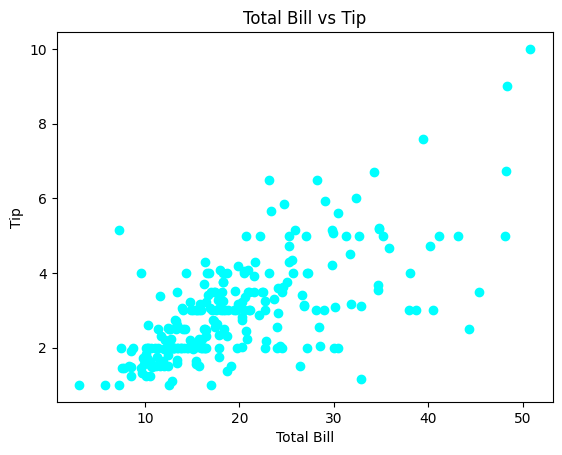

In [27]:
#Before using any model we must confirm the relationship..?
import matplotlib.pyplot as plt
plt.scatter(df["total_bill"],df["tip"],color='cyan')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()
#Observation 
#1.as the bill increases tip increases
#2.Relationship is a straight line(Linear Regression can be used)


5.Feature and Target Seperation

In [28]:
x=df[["total_bill"]] #Feature for input 2D only
y=df["tip"] #Feature output 1D


6.Train-Test-Split

In [29]:
#The model must perform well on unseen data so thats the reason the model is tested on the training data and then used on test data


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

7.Feature Standardization 

In [33]:
#1.Compares teh coefficients carefully and fairly
#2.Avoids the dominance of larger values
#3.Prepares for Ridge and Lasso Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#1.Fits only on training data
#2.Prevents the data leakage

8.Train the linear regression model

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train_scaled,y_train)
print("Co-efficients(m): ",model.coef_[0])
print("Intercept(c): ",model.intercept_)
y_pred = model.predict(x_test_scaled)


Co-efficients(m):  0.9357171400271826
Intercept(c):  3.0877948717948724


9.Model evaluation metrics

In [42]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2 score: ",r2)

R2 score:  0.5449381659234664


In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np 
mse = mean_squared_error(y_test,y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: " , rmse)

MSE:  0.5688142529229538
RMSE:  0.7541977545199626


10.Visualization of the best fit line

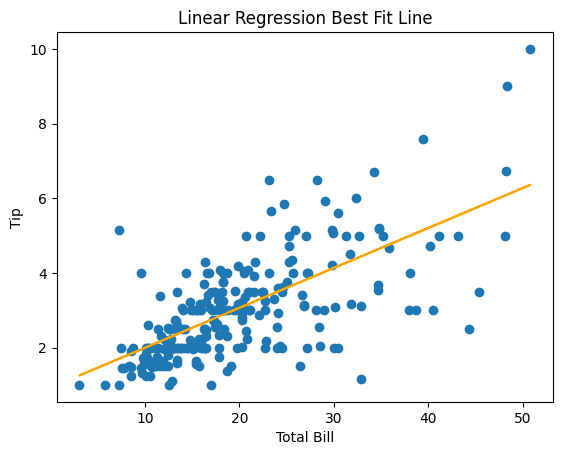

In [59]:
plt.scatter(x, y)
plt.plot(x, model.predict(scaler.transform(x)), color="orange")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression Best Fit Line")
plt.show()


11.Output Realtime

In [66]:
bill_amount = float(input("Enter the bill amount: "))
bill_scaled = scaler.transform([[bill_amount]])
predicted_tip = model.predict(bill_scaled)
print(f"Predicted tip: ${predicted_tip[0]:.2f}")


Predicted tip: $161.37


c:\Users\spand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
